In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.api as sm

In [294]:

forest_fires = pd.read_csv("Data/forestfires.csv")
forest_fires


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [256]:
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [257]:
forest_fires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [258]:
forest_fires.rename(columns={
    'X': 'X_coordinate',                   
    'Y': 'Y_coordinate',                   
    'month': 'Month',                     
    'day': 'Day',                          
    'FFMC': 'Fine_Fuel_Moisture_Code',     #Fine Fuel Moisture Code from the FWI
    'DMC': 'Duff_Moisture_Code',           
    'DC': 'Drought_Code',                 
    'ISI': 'Initial_Spread_Index',         
    'temp': 'Temperature_Celsius',        
    'RH': 'Relative_Humidity_Percentage',  
    'wind': 'Wind_Speed_kmh',              
    'rain': 'Rain_mm_per_m2',              
    'area': 'Burned_Area_ha'              
}, inplace=True)

In [259]:
forest_fires.head()

,X_coordinate,Y_coordinate,Month,Day,Fine_Fuel_Moisture_Code,Duff_Moisture_Code,Drought_Code,Initial_Spread_Index,Temperature_Celsius,Relative_Humidity_Percentage,Wind_Speed_kmh,Rain_mm_per_m2,Burned_Area_ha
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [260]:
forest_fires.describe()

,X_coordinate,Y_coordinate,Fine_Fuel_Moisture_Code,Duff_Moisture_Code,Drought_Code,Initial_Spread_Index,Temperature_Celsius,Relative_Humidity_Percentage,Wind_Speed_kmh,Rain_mm_per_m2,Burned_Area_ha
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [261]:
forest_fires.isnull().sum()

X_coordinate                    0
Y_coordinate                    0
Month                           0
Day                             0
Fine_Fuel_Moisture_Code         0
Duff_Moisture_Code              0
Drought_Code                    0
Initial_Spread_Index            0
Temperature_Celsius             0
Relative_Humidity_Percentage    0
Wind_Speed_kmh                  0
Rain_mm_per_m2                  0
Burned_Area_ha                  0
dtype: int64

<Axes: >

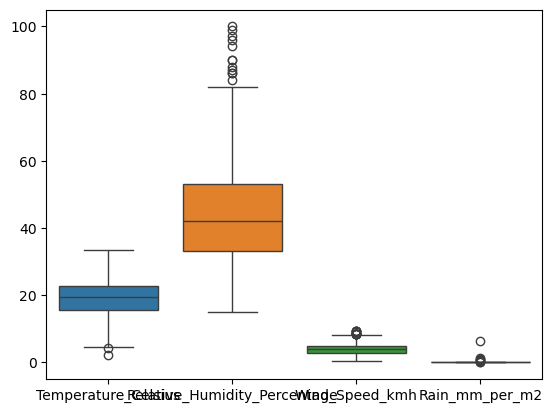

In [262]:
sns.boxplot(data=forest_fires[['Temperature_Celsius', 'Relative_Humidity_Percentage', 'Wind_Speed_kmh', 'Rain_mm_per_m2']])

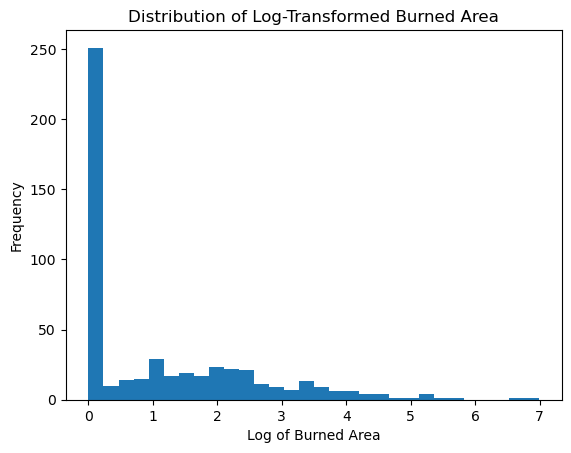

In [263]:
forest_fires['log_Burned_Area'] = np.log1p(forest_fires['Burned_Area_ha'])
plt.hist(forest_fires['log_Burned_Area'], bins=30)
plt.xlabel('Log of Burned Area')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Burned Area')
plt.show()

In [264]:
forest_fires['Fire_Occurrence'] = forest_fires['Burned_Area_ha'].apply(lambda x: 1 if x > 0 else 0)

In [265]:
X = forest_fires.drop(columns=['Burned_Area_ha', 'Fire_Occurrence'])
y = forest_fires['Fire_Occurrence']

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [267]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (413, 13)
y_train shape: (413,)


In [268]:
print(X_train.dtypes)

X_coordinate                      int64
Y_coordinate                      int64
Month                            object
Day                              object
Fine_Fuel_Moisture_Code         float64
Duff_Moisture_Code              float64
Drought_Code                    float64
Initial_Spread_Index            float64
Temperature_Celsius             float64
Relative_Humidity_Percentage      int64
Wind_Speed_kmh                  float64
Rain_mm_per_m2                  float64
log_Burned_Area                 float64
dtype: object


In [269]:
X_train = pd.get_dummies(X_train, columns=['Month', 'Day'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Month', 'Day'], drop_first=True)

In [270]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [271]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [272]:
y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[51  0]
 [ 0 53]]


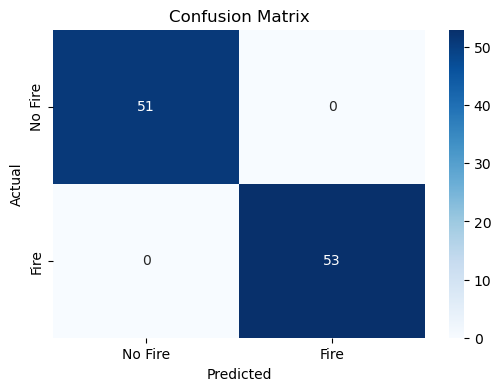

In [273]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [274]:
y = y.values.ravel()

In [275]:
print(type(y_train))
print(type(y_test))
print(y_train.shape)
print(y_test.shape)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
(413,)
(104,)


In [276]:
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

X_train columns: Index(['X_coordinate', 'Y_coordinate', 'Fine_Fuel_Moisture_Code',
       'Duff_Moisture_Code', 'Drought_Code', 'Initial_Spread_Index',
       'Temperature_Celsius', 'Relative_Humidity_Percentage', 'Wind_Speed_kmh',
       'Rain_mm_per_m2', 'log_Burned_Area', 'Month_aug', 'Month_dec',
       'Month_feb', 'Month_jan', 'Month_jul', 'Month_jun', 'Month_mar',
       'Month_may', 'Month_nov', 'Month_oct', 'Month_sep', 'Day_mon',
       'Day_sat', 'Day_sun', 'Day_thu', 'Day_tue', 'Day_wed'],
      dtype='object')
X_test columns: Index(['X_coordinate', 'Y_coordinate', 'Fine_Fuel_Moisture_Code',
       'Duff_Moisture_Code', 'Drought_Code', 'Initial_Spread_Index',
       'Temperature_Celsius', 'Relative_Humidity_Percentage', 'Wind_Speed_kmh',
       'Rain_mm_per_m2', 'log_Burned_Area', 'Month_aug', 'Month_dec',
       'Month_feb', 'Month_jan', 'Month_jul', 'Month_jun', 'Month_mar',
       'Month_may', 'Month_nov', 'Month_oct', 'Month_sep', 'Day_mon',
       'Day_sat', 'Day_sun',

In [277]:
X = pd.get_dummies(X, columns=['Month', 'Day'], drop_first=True)

In [278]:
for i in range(5):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

   
    y_pred = classifier.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random State {i} - Accuracy: {accuracy}")

Random State 0 - Accuracy: 1.0
Random State 1 - Accuracy: 1.0
Random State 2 - Accuracy: 1.0
Random State 3 - Accuracy: 1.0
Random State 4 - Accuracy: 1.0


In [279]:

classifier = RandomForestClassifier(random_state=42, class_weight="balanced")
scores = cross_val_score(classifier, X, y, cv=5)  
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [1.         0.99038462 1.         1.         1.        ]
Mean Accuracy: 0.998076923076923


It provides very high accuracy for different random cases, which is probably due to the imbalance of the dataset. If your dataset has many more non-fire examples, the model can predict each class with very high accuracy.


In [280]:
y_series = pd.Series(y)
print(y_series.value_counts())

1    270
0    247
Name: count, dtype: int64


It may be a good approach to consider imbalanced class problems when measuring the performance of the model.

In [281]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42, class_weight='balanced')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



In [282]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[51  0]
 [ 0 53]]


In [283]:
classifier.fit(X, y)  # Train the model on the full dataset
feature_importances = classifier.feature_importances_

#features and their importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                         Feature  Importance
10               log_Burned_Area    0.787198
6            Temperature_Celsius    0.032031
3             Duff_Moisture_Code    0.024478
4                   Drought_Code    0.023537
7   Relative_Humidity_Percentage    0.022155
0                   X_coordinate    0.018564
8                 Wind_Speed_kmh    0.017059
5           Initial_Spread_Index    0.017056
2        Fine_Fuel_Moisture_Code    0.016123
1                   Y_coordinate    0.011625
12                     Month_dec    0.004722
23                       Day_sat    0.003197
17                     Month_mar    0.002375
26                       Day_tue    0.002227
22                       Day_mon    0.002030
25                       Day_thu    0.001980
9                 Rain_mm_per_m2    0.001880
21                     Month_sep    0.001833
24                       Day_sun    0.001719
15                     Month_jul    0.001622
11                     Month_aug    0.001550
27        

X_coordinate                      int64
Y_coordinate                      int64
Month                            object
Day                              object
Fine_Fuel_Moisture_Code         float64
Duff_Moisture_Code              float64
Drought_Code                    float64
Initial_Spread_Index            float64
Temperature_Celsius             float64
Relative_Humidity_Percentage      int64
Wind_Speed_kmh                  float64
Rain_mm_per_m2                  float64
Burned_Area_ha                  float64
log_Burned_Area                 float64
Fire_Occurrence                   int64
dtype: object


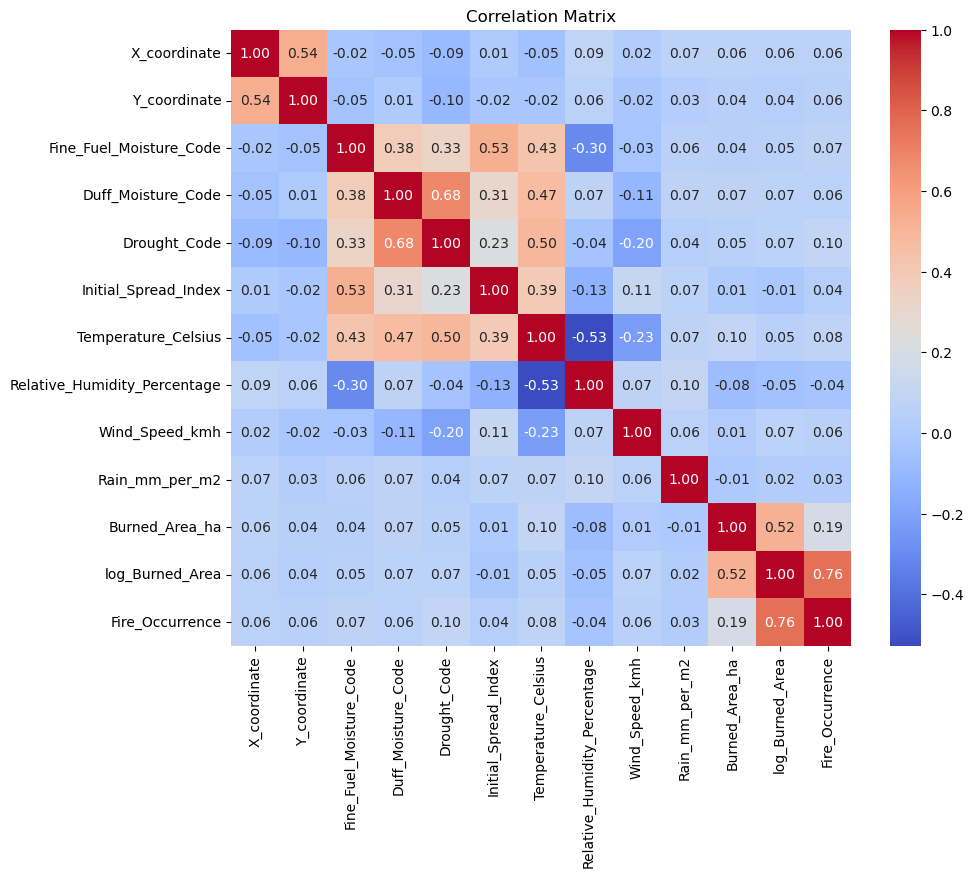

In [284]:
print(forest_fires.dtypes)

forest_fires_numeric = forest_fires.select_dtypes(include=[np.number])

correlation_matrix = forest_fires_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

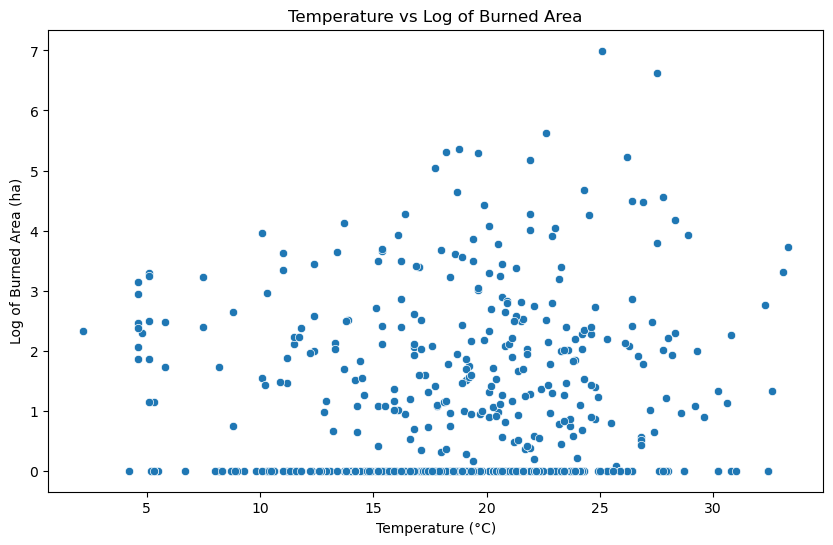

In [285]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=forest_fires, x='Temperature_Celsius', y='log_Burned_Area')
plt.title('Temperature vs Log of Burned Area')
plt.xlabel('Temperature (°C)')
plt.ylabel('Log of Burned Area (ha)')
plt.show()

In [286]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [287]:
y_pred = model.predict(X_test)

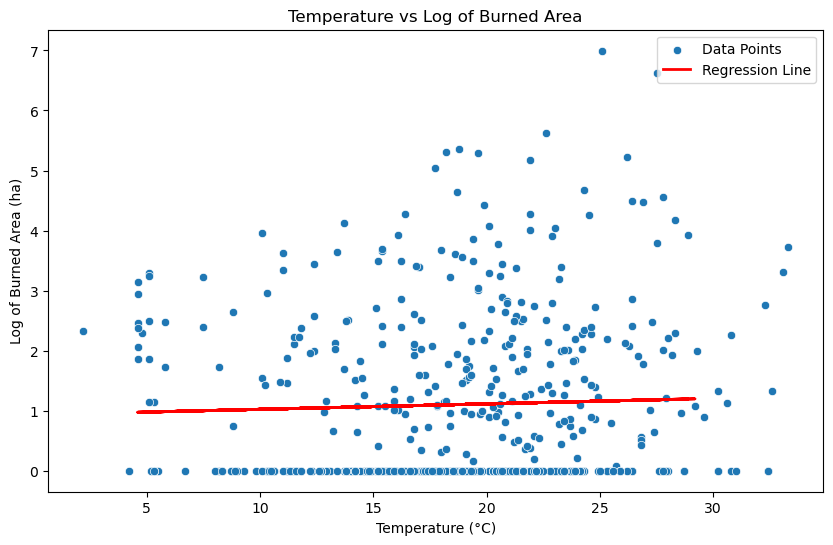

In [288]:
X = forest_fires[['Temperature_Celsius']]
y = forest_fires['log_Burned_Area']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=forest_fires, x='Temperature_Celsius', y='log_Burned_Area', label='Data Points')
plt.plot(X_test, y_pred, color='red', label='Regression Line', linewidth=2)
plt.title('Temperature vs Log of Burned Area')
plt.xlabel('Temperature (°C)')
plt.ylabel('Log of Burned Area (ha)')
plt.legend()
plt.show()

In [289]:

X = forest_fires['Temperature_Celsius']
y = forest_fires['log_Burned_Area']


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

print(model.summary())


r_squared = model.rsquared
print(f'R² : {r_squared}')

                            OLS Regression Results                            
Dep. Variable:        log_Burned_Area   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.478
Date:                Wed, 06 Nov 2024   Prob (F-statistic):              0.225
Time:                        12:54:01   Log-Likelihood:                -905.73
No. Observations:                 517   AIC:                             1815.
Df Residuals:                     515   BIC:                             1824.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8677    

This is a very low value, suggesting that temperature alone is not a strong predictor of burned area in this dataset

In [290]:
forest_fires['Temp_Humidity'] = forest_fires['Temperature_Celsius'] * forest_fires['Relative_Humidity_Percentage']
forest_fires['Temp_Wind'] = forest_fires['Temperature_Celsius'] * forest_fires['Wind_Speed_kmh']
forest_fires['Humidity_Wind'] = forest_fires['Relative_Humidity_Percentage'] * forest_fires['Wind_Speed_kmh']




scaler = StandardScaler()
forest_fires[['Temperature_Celsius', 'Relative_Humidity_Percentage', 'Wind_Speed_kmh']] = scaler.fit_transform(
    forest_fires[['Temperature_Celsius', 'Relative_Humidity_Percentage', 'Wind_Speed_kmh']]
)


X = forest_fires[['Temperature_Celsius', 'Relative_Humidity_Percentage', 'Wind_Speed_kmh', 
                   'Temp_Humidity', 'Temp_Wind', 'Humidity_Wind']]
y = forest_fires['log_Burned_Area']


import statsmodels.api as sm

X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        log_Burned_Area   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.838
Date:                Wed, 06 Nov 2024   Prob (F-statistic):             0.0898
Time:                        12:54:01   Log-Likelihood:                -900.94
No. Observations:                 517   AIC:                             1816.
Df Residuals:                     510   BIC:                             1846.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [291]:
print(forest_fires.dtypes)

X_coordinate                      int64
Y_coordinate                      int64
Month                            object
Day                              object
Fine_Fuel_Moisture_Code         float64
Duff_Moisture_Code              float64
Drought_Code                    float64
Initial_Spread_Index            float64
Temperature_Celsius             float64
Relative_Humidity_Percentage    float64
Wind_Speed_kmh                  float64
Rain_mm_per_m2                  float64
Burned_Area_ha                  float64
log_Burned_Area                 float64
Fire_Occurrence                   int64
Temp_Humidity                   float64
Temp_Wind                       float64
Humidity_Wind                   float64
dtype: object
